# Feature selection Socio-Economical Data: World Bank Indicators

Fabiana Castiblanco 

**GitHub**: fabi-cast

From the World Bank Indicators, we have at the moment 92 indicators. Do we have any correlation between them? Is it feasible to drop some of them?


In [1]:
import pandas as pd
import numpy as np
import re
import math
import requests
import json
import matplotlib
from pandas import ExcelFile
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
#loading the dataset
#df = pd.read_csv("Data_input/WBI.csv", sep = ";")
df = pd.read_csv("Data_input/OUTPUT_WBI.csv", sep = ";")
#this function creates a dataset for each country in the desired format
def get_WBI(isocode):
    indicators = list(df[df["Country Code"] == isocode].drop(columns = ["Country Name"]).T.iloc[1])
    cols = list(df[df["Country Code"] == isocode].drop(columns = ["Country Name"]).T.columns)
    dict_cols = {cols[i]: indicators[i] for i in range(len(cols))}
    data = (df[df["Country Code"] == isocode].drop(columns = ["Country Name"])
                                           .T.rename(columns = dict_cols)
                                           .drop(labels=["Country Code", "Series Name", "Income_level", "Indicator_CAT"], axis =0))
    data = data.reset_index().rename(columns = {"index": "Year"})
    data["ISO3"] = isocode
    return data

In [72]:
def get_WBI_cat(isocode, category):
    indicators = list(df[df["Country Code"] == isocode].drop(columns = ["Country Name"]).T.iloc[1])
    cols = list(df[df["Country Code"] == isocode].drop(columns = ["Country Name"]).T.columns)
    dict_cols = {cols[i]: indicators[i] for i in range(len(cols))}
    data = df[df["Indicator_CAT"] == category]
    data = (df[df["Country Code"] == isocode].drop(columns = ["Country Name"])
                                           .T.rename(columns = dict_cols)
                                           .drop(labels=["Country Code", "Series Name", "Income_level", "Indicator_CAT"], axis =0))
    data = data.reset_index().rename(columns = {"index": "Year"})
    data["ISO3"] = isocode
    return data

In [3]:
codes = list(df["Country Code"].value_counts().index)
codes.sort()


In [4]:
#running the function for each country and store it as a list of datasets
all_countries = [get_WBI(iso) for iso in codes]

#concat all the datasets
ds = pd.concat(all_countries)

We want to have the name and code for each country as well, so we subset the original data set for obtaining this data:

In [5]:
countries_codes = df[["Country Name", "Country Code"]].copy()
countries_codes.drop_duplicates(keep="first",inplace=True) 

Lastly we merge both datasets and drop duplicated columns:

In [6]:
ds_new = countries_codes.merge(ds, left_on = "Country Code", right_on = "ISO3", how = "right").drop(columns = "ISO3")

In [7]:
ds_new.head()

,Country Name,Country Code,Year,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)",Arable land (hectares per person),Average precipitation in depth (mm per year),...,Refugee population by country or territory of origin,Rural population (% of total population),"School enrollment, primary (% gross)","School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)","Secondary education, duration (years)","Tuberculosis case detection rate (%, all forms)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),"Vulnerable employment, total (% of total employment) (modeled ILO estimate)"
0,Aruba,ABW,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,49.224,NaN,NaN,NaN,NaN,NaN,NaN,50.776,NaN
1,Aruba,ABW,1961,NaN,NaN,NaN,NaN,NaN,0.0360763,NaN,...,NaN,49.239,NaN,NaN,NaN,NaN,NaN,NaN,50.761,NaN
2,Aruba,ABW,1962,NaN,NaN,NaN,NaN,NaN,0.0355714,NaN,...,NaN,49.254,NaN,NaN,NaN,NaN,NaN,NaN,50.746,NaN
3,Aruba,ABW,1963,NaN,NaN,NaN,NaN,NaN,0.0352765,NaN,...,NaN,49.27,NaN,NaN,NaN,NaN,NaN,NaN,50.73,NaN
4,Aruba,ABW,1964,NaN,NaN,NaN,NaN,NaN,0.035068,NaN,...,NaN,49.285,NaN,NaN,NaN,NaN,NaN,NaN,50.715,NaN


# Subsetting categories

First we will create an auxiliary data set containing all the different categories of features. Next we will create a function subseting from our main data set the category we need:

In [77]:
categories = df[["Series Name", "Indicator_CAT"]].drop_duplicates().rename(columns = {"Series Name":"indicator"})

In [84]:
categories

,indicator,Indicator_CAT
0,Access to electricity (% of population),Infrastructure
1,"Access to electricity, rural (% of rural popul...",Infrastructure
2,"Access to electricity, urban (% of urban popul...",Infrastructure
3,"Agriculture, forestry, and fishing, value adde...",Economy
4,"Agriculture, forestry, and fishing, value adde...",Economy
...,...,...
87,"Secondary education, duration (years)",Education
88,"Tuberculosis case detection rate (%, all forms)",Health
89,"Unemployment, total (% of total labor force) (...",Economy
90,Urban population (% of total population),Population


In [87]:
def get_cat(dataset, category):
    features = ["Country Name", "Country Code", "Year"]
    features = features + list(categories[categories["Indicator_CAT"] == category].indicator)
    return dataset[features]

For example if we are interested in the ``Economy`` indicators, we get:

In [88]:
get_cat(ds_new, "Economy")

,Country Name,Country Code,Year,"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)",GDP (constant LCU),GDP growth (annual %),GDP per capita (constant 2010 US$),"GDP, PPP (constant 2011 international $)",GNI per capita (constant 2010 US$),GNI per capita growth (annual %),"Inflation, GDP deflator (annual %)",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)"
0,Aruba,ABW,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13255,Taiwan,TWN,2015,8.422041,3236.335053,6.860000e+13,6.905317,6484.435948,1.860000e+13,6460.159362,5.825402,0.062699,0.7,7.0,27.2,4.600,45.671999
13256,Taiwan,TWN,2016,8.126251,3442.244864,7.320000e+13,6.736675,6883.895425,1.980000e+13,6856.284460,6.131816,1.072756,0.5,5.4,23.9,4.500,45.074999
13257,Taiwan,TWN,2017,7.566150,3664.758740,7.820000e+13,6.757008,7308.065366,2.110000e+13,7302.538854,6.508691,3.884170,NaN,NaN,NaN,4.400,44.433999
13258,Taiwan,TWN,2018,7.190194,3830.369398,8.330000e+13,6.566974,7752.559525,2.250000e+13,7723.170190,5.760070,2.933332,NaN,NaN,NaN,4.417,43.828001


# Finding NaN values

First we will explore how much of our features have null values:

In [8]:
def null_cols(data):

    """
    This function takes a dataframe df and shows the columns of df that have NaN values
    and the number of them

    """
    nulls = data.isna().sum()
    nulls = nulls[nulls > 0] / len(data) * 100
    nulls = pd.DataFrame(nulls.sort_values(ascending = False))
    nulls = nulls.reset_index().rename(columns = {"index": "Feature", 0: "% Null rows"})
    return nulls

In [9]:
#Reset index to make it unique
ds_new.reset_index(drop = True, inplace= True)

In [10]:
ds_new.head()

,Country Name,Country Code,Year,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)",Arable land (hectares per person),Average precipitation in depth (mm per year),...,Refugee population by country or territory of origin,Rural population (% of total population),"School enrollment, primary (% gross)","School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)","Secondary education, duration (years)","Tuberculosis case detection rate (%, all forms)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),"Vulnerable employment, total (% of total employment) (modeled ILO estimate)"
0,Aruba,ABW,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,49.224,NaN,NaN,NaN,NaN,NaN,NaN,50.776,NaN
1,Aruba,ABW,1961,NaN,NaN,NaN,NaN,NaN,0.0360763,NaN,...,NaN,49.239,NaN,NaN,NaN,NaN,NaN,NaN,50.761,NaN
2,Aruba,ABW,1962,NaN,NaN,NaN,NaN,NaN,0.0355714,NaN,...,NaN,49.254,NaN,NaN,NaN,NaN,NaN,NaN,50.746,NaN
3,Aruba,ABW,1963,NaN,NaN,NaN,NaN,NaN,0.0352765,NaN,...,NaN,49.27,NaN,NaN,NaN,NaN,NaN,NaN,50.73,NaN
4,Aruba,ABW,1964,NaN,NaN,NaN,NaN,NaN,0.035068,NaN,...,NaN,49.285,NaN,NaN,NaN,NaN,NaN,NaN,50.715,NaN


Many indicators have a large amount of null values:

In [12]:
null_cols(ds_new)

,Feature,% Null rows
0,Ever-breastfed rates (%),99.064857
1,"Net official flows from UN agencies, ILO (curr...",92.911011
2,"Net official flows from UN agencies, WHO (curr...",92.895928
3,Logistics performance index: Ability to track ...,92.790347
4,Logistics performance index: Quality of trade ...,92.790347
...,...,...
87,"Birth rate, crude (per 1,000 people)",10.822021
88,Population density (people per sq. km of land ...,6.530920
89,Rural population (% of total population),3.061840
90,Urban population (% of total population),3.061840


Mos of our columns lack over 10% of the data:

In [13]:
null_cols(ds_new)[null_cols(ds_new)["% Null rows"]>=10]

,Feature,% Null rows
0,Ever-breastfed rates (%),99.064857
1,"Net official flows from UN agencies, ILO (curr...",92.911011
2,"Net official flows from UN agencies, WHO (curr...",92.895928
3,Logistics performance index: Ability to track ...,92.790347
4,Logistics performance index: Quality of trade ...,92.790347
...,...,...
83,"Population ages 00-04, male (% of male populat...",12.405732
84,"Population, male (% of total population)",12.405732
85,"Population ages 00-04, female (% of female pop...",12.405732
86,"Death rate, crude (per 1,000 people)",11.003017


# Correlations between the features

Here we should isolate the non numerical features from the rest. We first should check the data types of the data set:

In [17]:
#Infering the data type of each column

ds_new = ds_new.infer_objects()

In [23]:
# Setting Year as integer variable

ds_new["Year"] = ds_new.Year.astype(int)

In [26]:
#Selecting the numerical features

numerical_features = list(ds_new.select_dtypes(include=['float64', "int"]).columns)

In [46]:
#New data sets to construct the correlation matrix
ds_num = ds_new[numerical_features]

Finally we can construct the correlation matrix just using the numerical features to make sense of our data.

In [63]:
#correlation matrices
corr_num = ds_num.corr(method = "spearman")

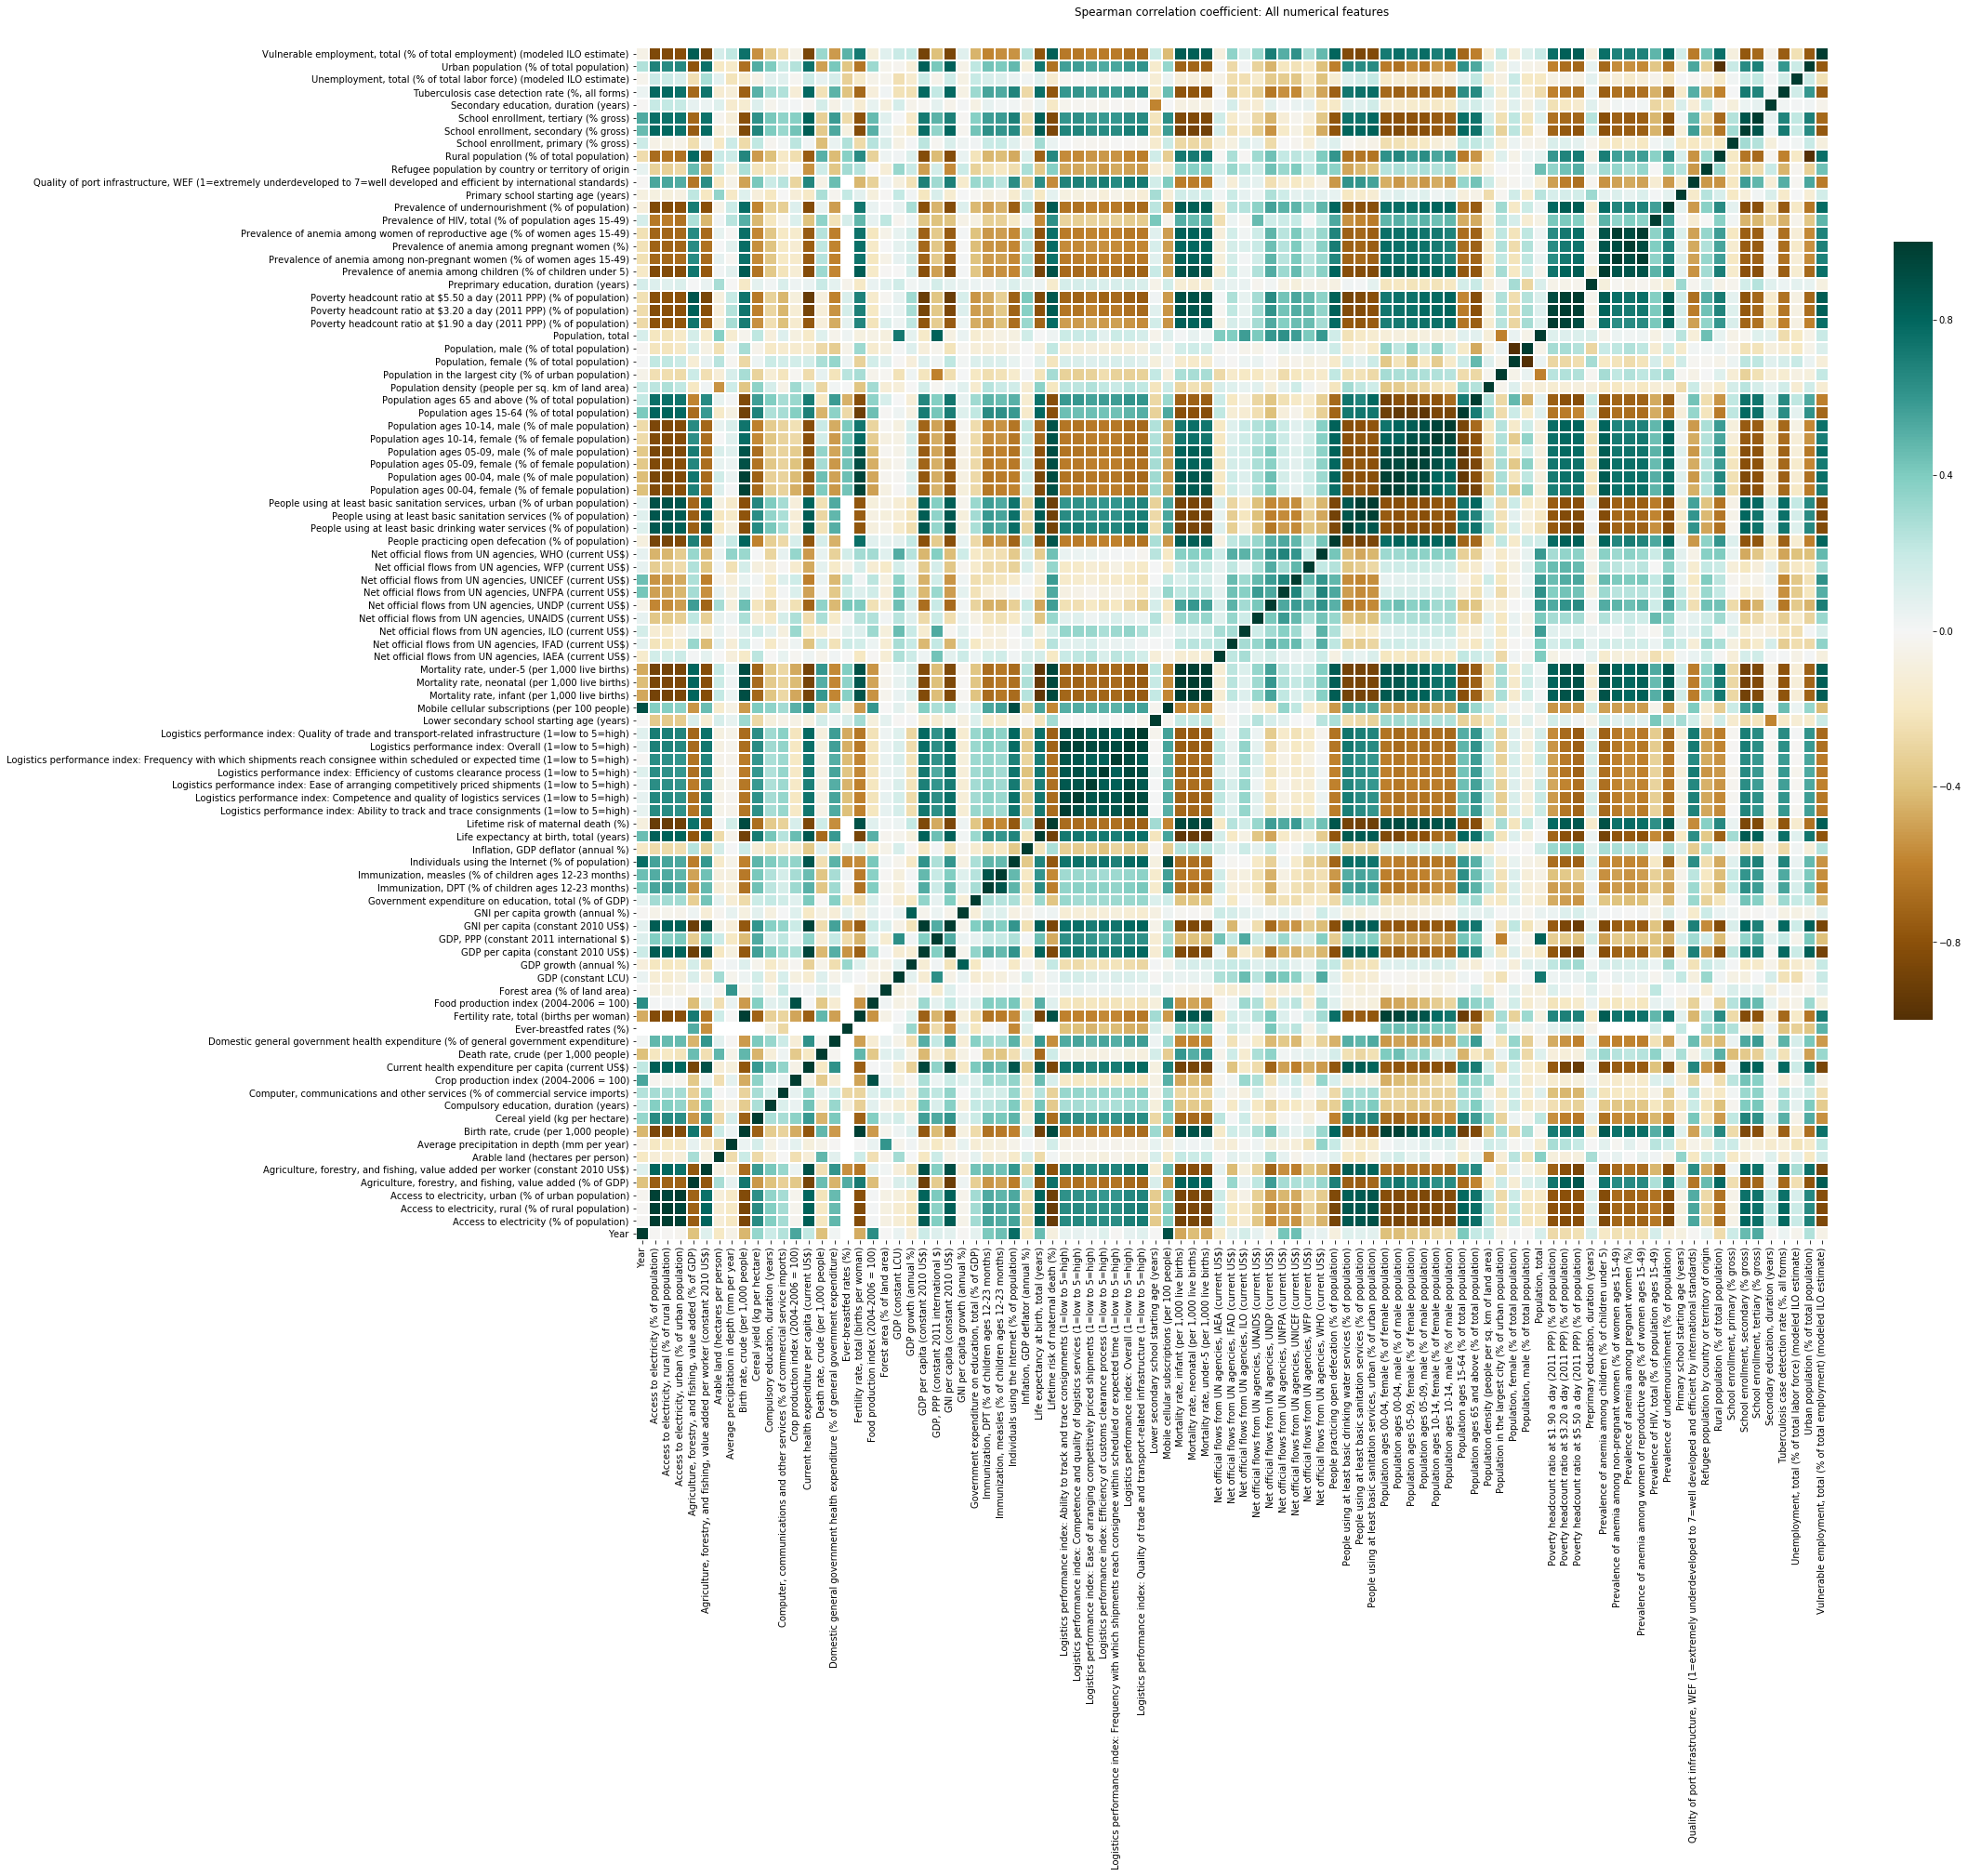

In [68]:
fig, ax = plt.subplots(figsize=(25,25))

sns.heatmap(corr_num,
            #annot = True,
            square=True,
            linewidth=1,# space between cells
            cmap="BrBG", 
            cbar_kws={'fraction' : 0.03}, # shrink colour bar
            ax = ax);
ax.set(ylim=(0, 95));

ax.set_title("Spearman correlation coefficient: All numerical features");

Tricky to see from this map alone, but remember, our target variable is **population**, so we can go a little bit further and just consider features with correlates in absolute value greater than 0.3 with ``Population, total``. Here we are looking for weak to strong correlations. Also, I choose Spearman because most likely our variables are correlated in a monotonous way.

In [65]:
#selecting features which correlate with population with Spearman coefficient at least 0.30
corr_num_list = list(corr_num[abs(corr_num["Population, total"])>0.30].index)

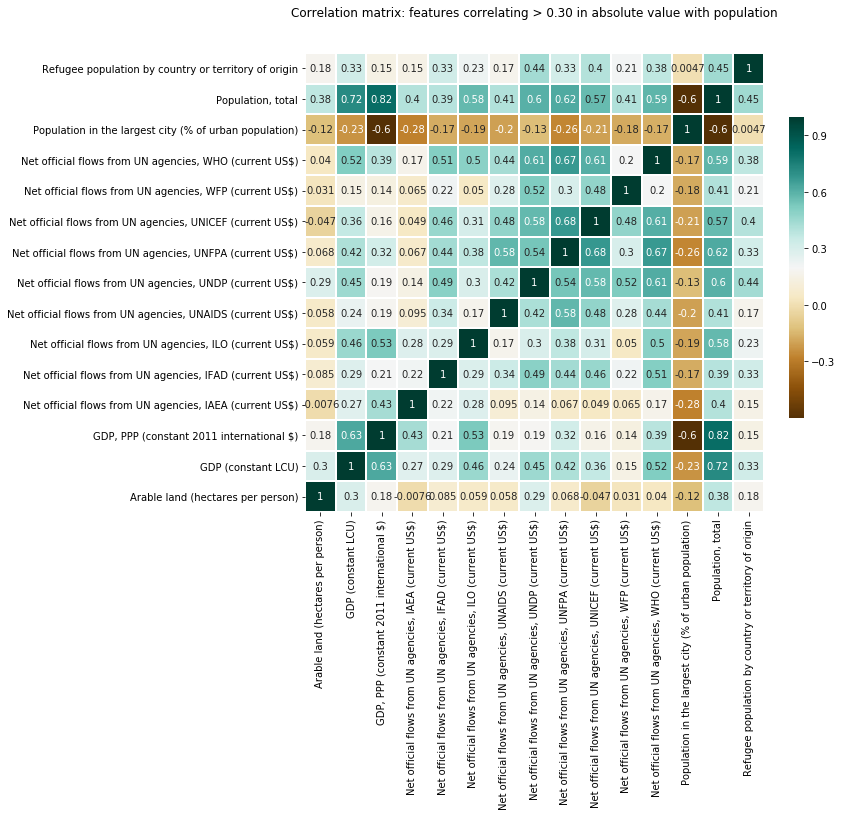

In [69]:
fig, ax = plt.subplots(figsize=(9,9))

sns.heatmap(corr_num[corr_num.index.isin(corr_num_list)][corr_num_list],
            annot = True,
            square=True,
            linewidth=1,# space between cells
            cmap="BrBG", 
            cbar_kws={'fraction' : 0.03}, # shrink colour bar
            ax = ax);
ax.set(ylim=(0, 16));
ax.set_title("Correlation matrix: features correlating > 0.30 in absolute value with population");

# Analyzing correlations by category

We can pick each one of the categories and running a correlation analysis in a similar way:

In [104]:
#List all the categories in the dataset
CATS = list(categories.Indicator_CAT.value_counts().index)

For finding correlations in each category, we create a function:

In [107]:
def get_corr(dataset,category):
    """
    Plot the Spearman correlation matrix between the features in category
    """
    data = get_cat(dataset, category)
    num_feat = list(data.select_dtypes(include=['float64', "int"]).columns)
    data_num = data[num_feat]
    #correlation matrices
    corr_mat = data_num.corr(method = "spearman")
    
    fig, ax = plt.subplots(figsize=(15,15))

    sns.heatmap(corr_mat,
                annot = True,
                square=True,
                linewidth=1,# space between cells
                cmap="BrBG", 
                cbar_kws={'fraction' : 0.03}, # shrink colour bar
                ax = ax);
    ax.set(ylim=(0, len(corr_mat)));

    ax.set_title("Spearman correlation coefficient: {}".format(category));
    

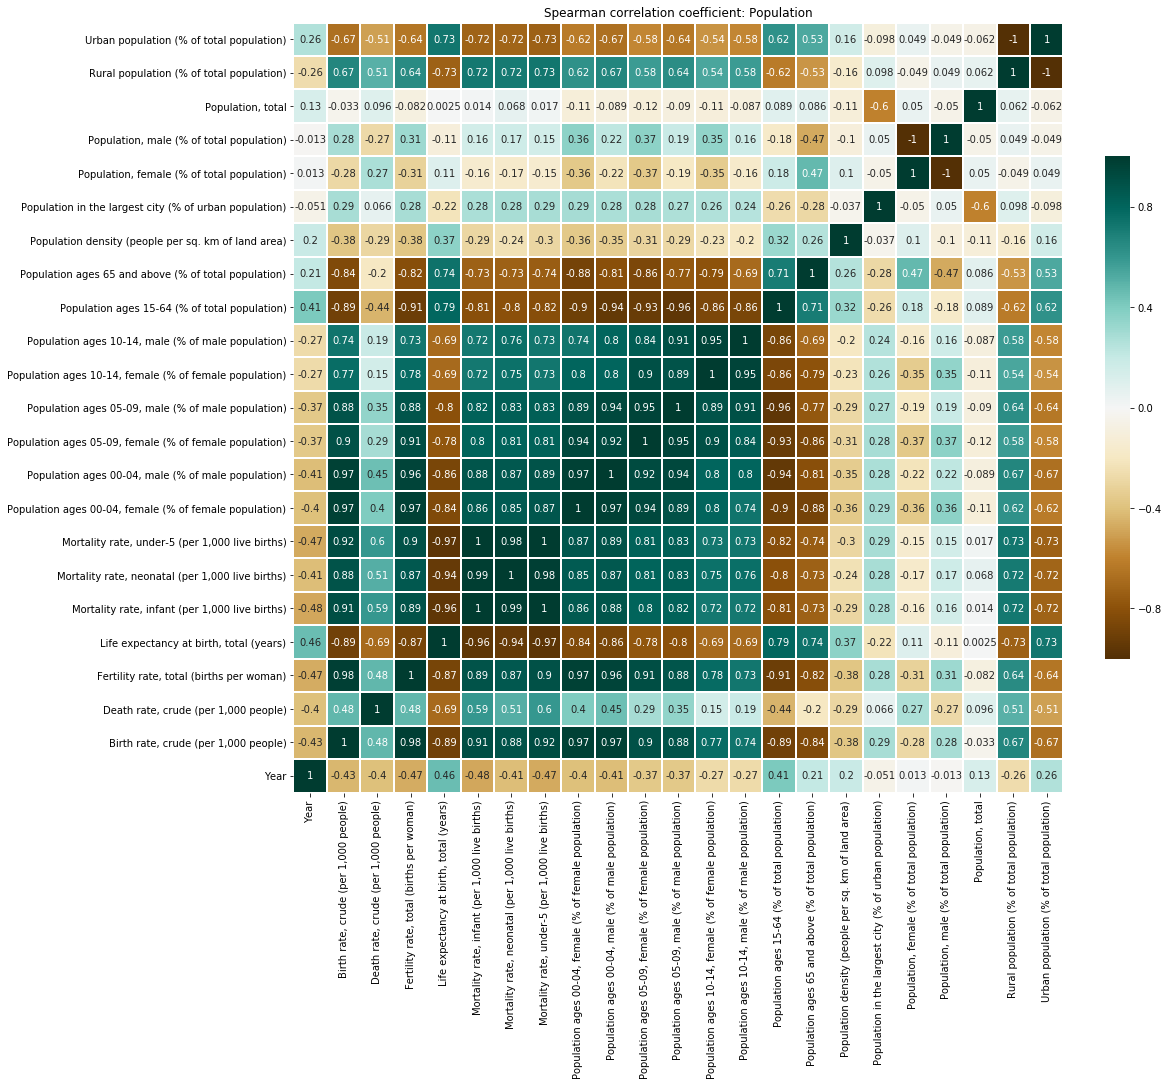

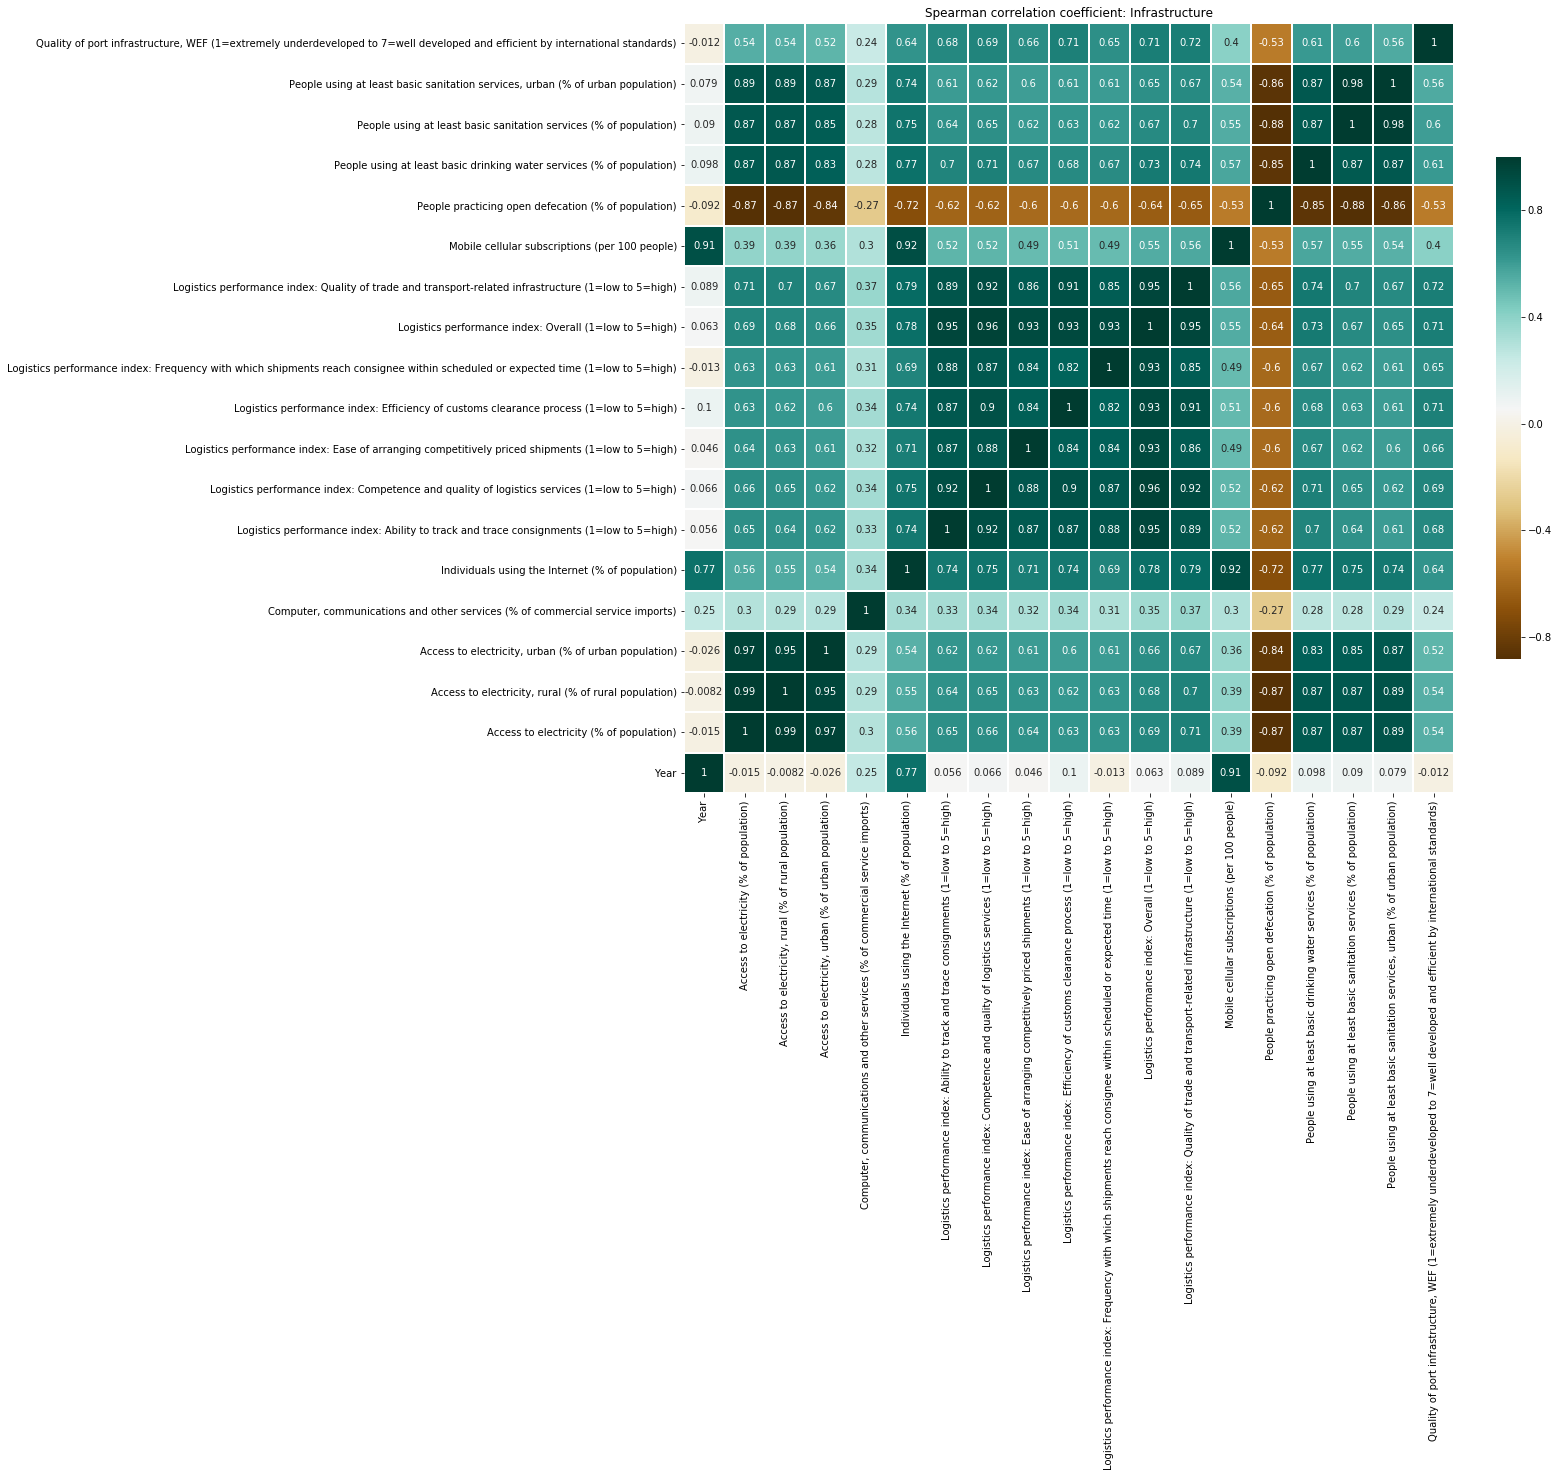

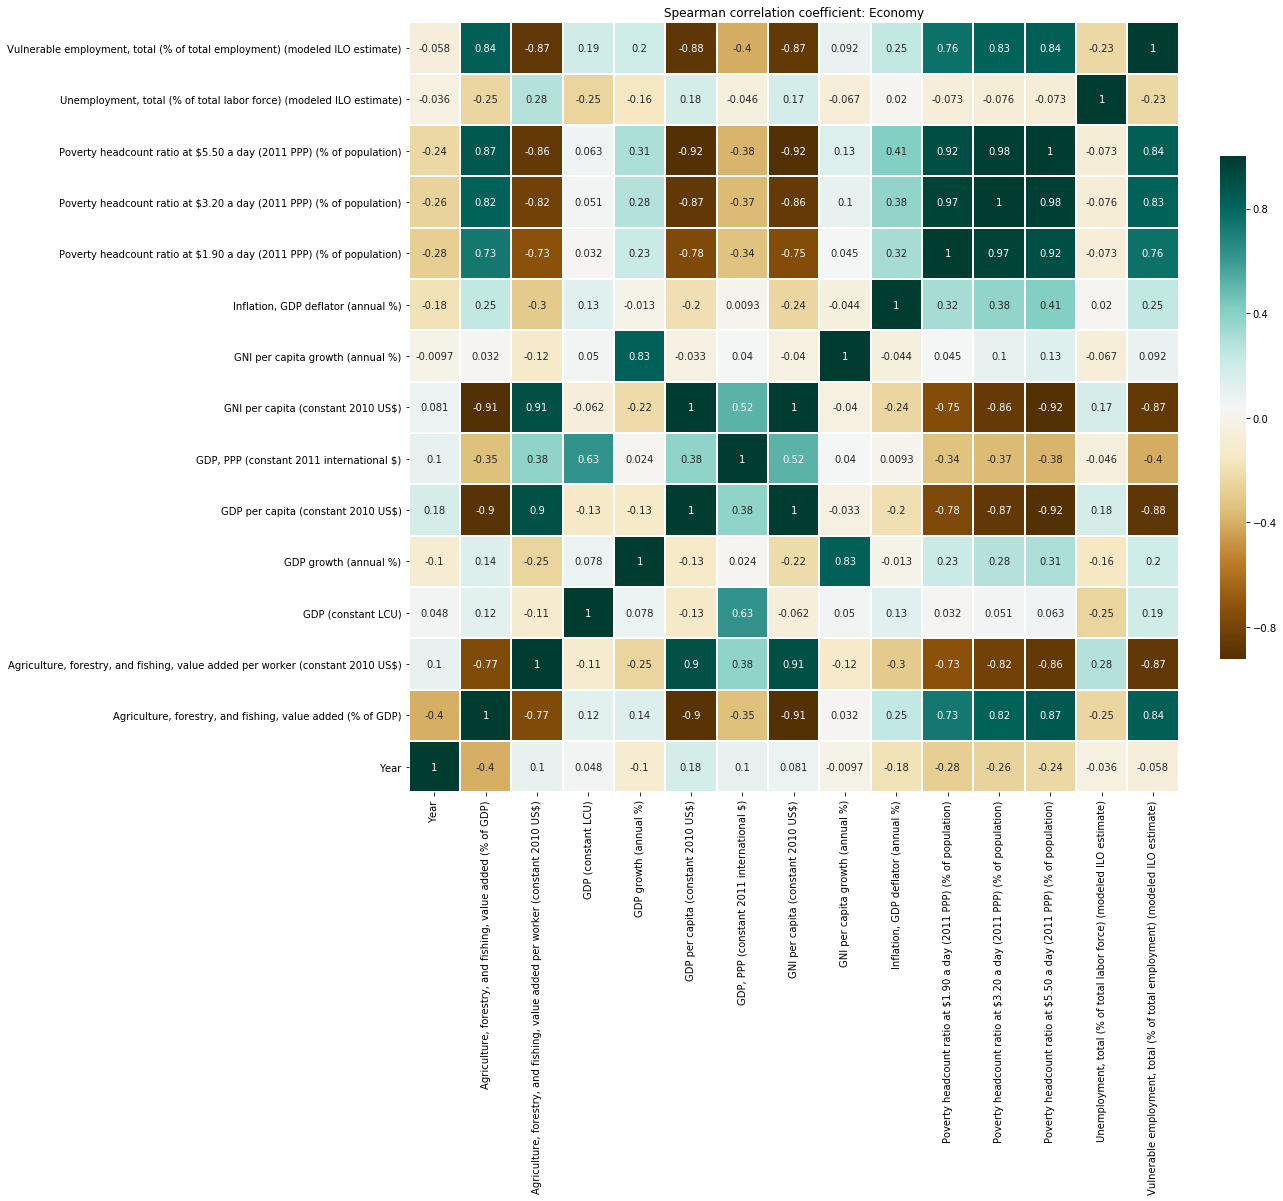

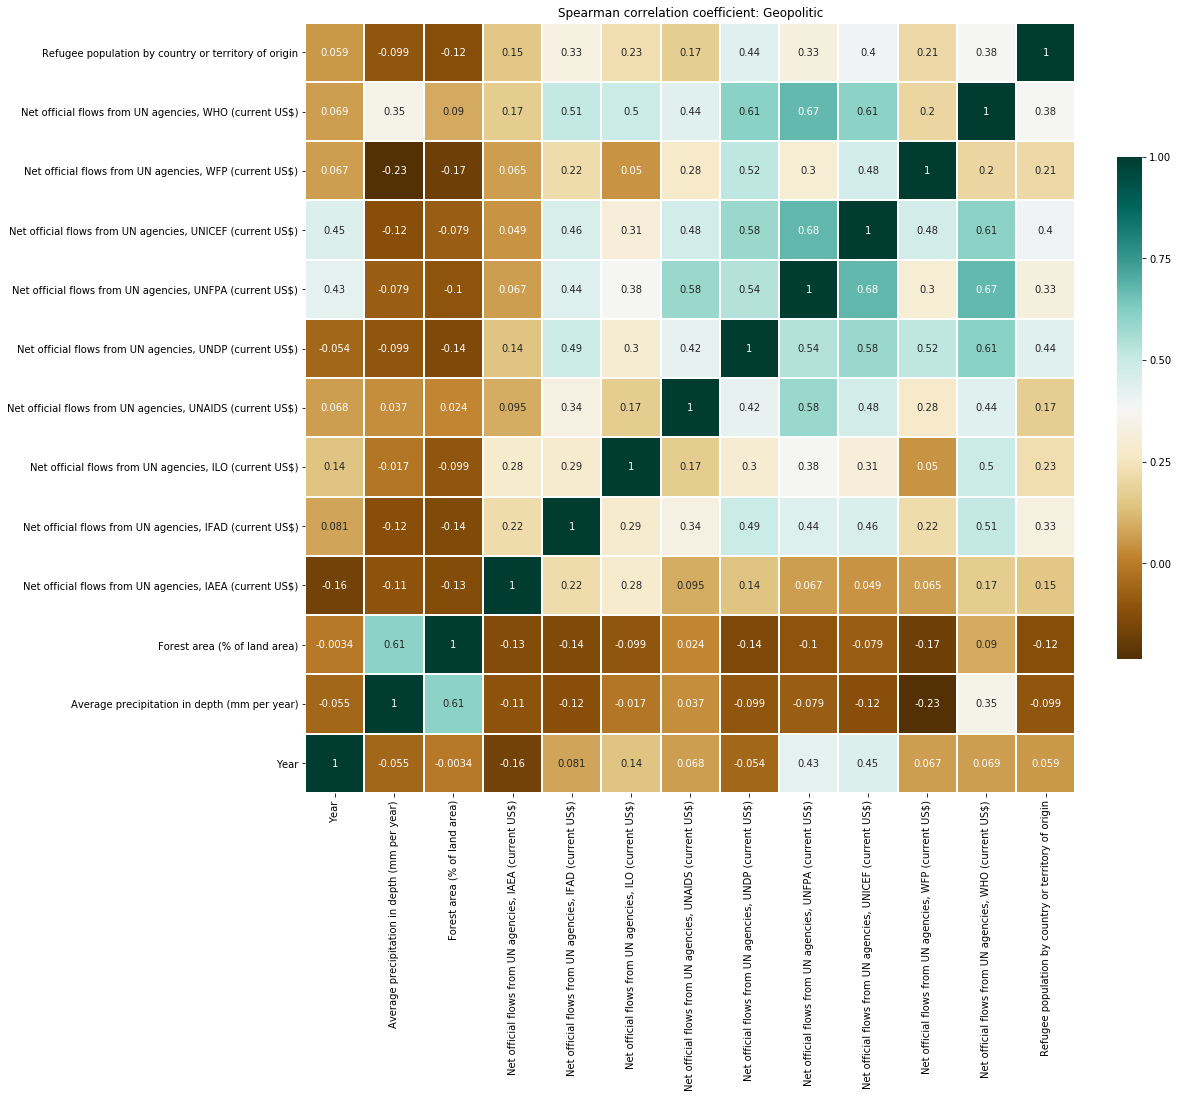

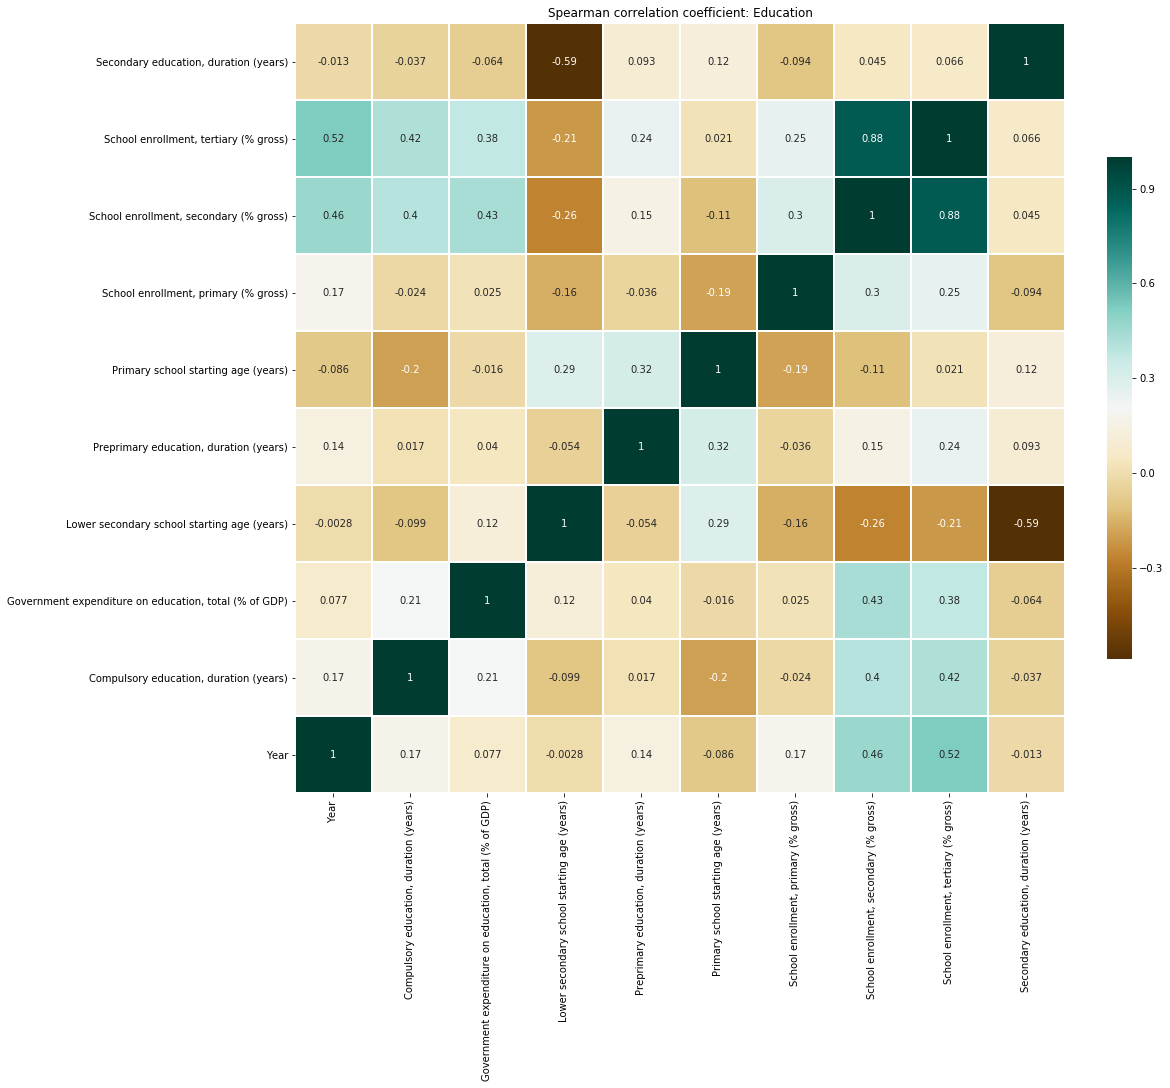

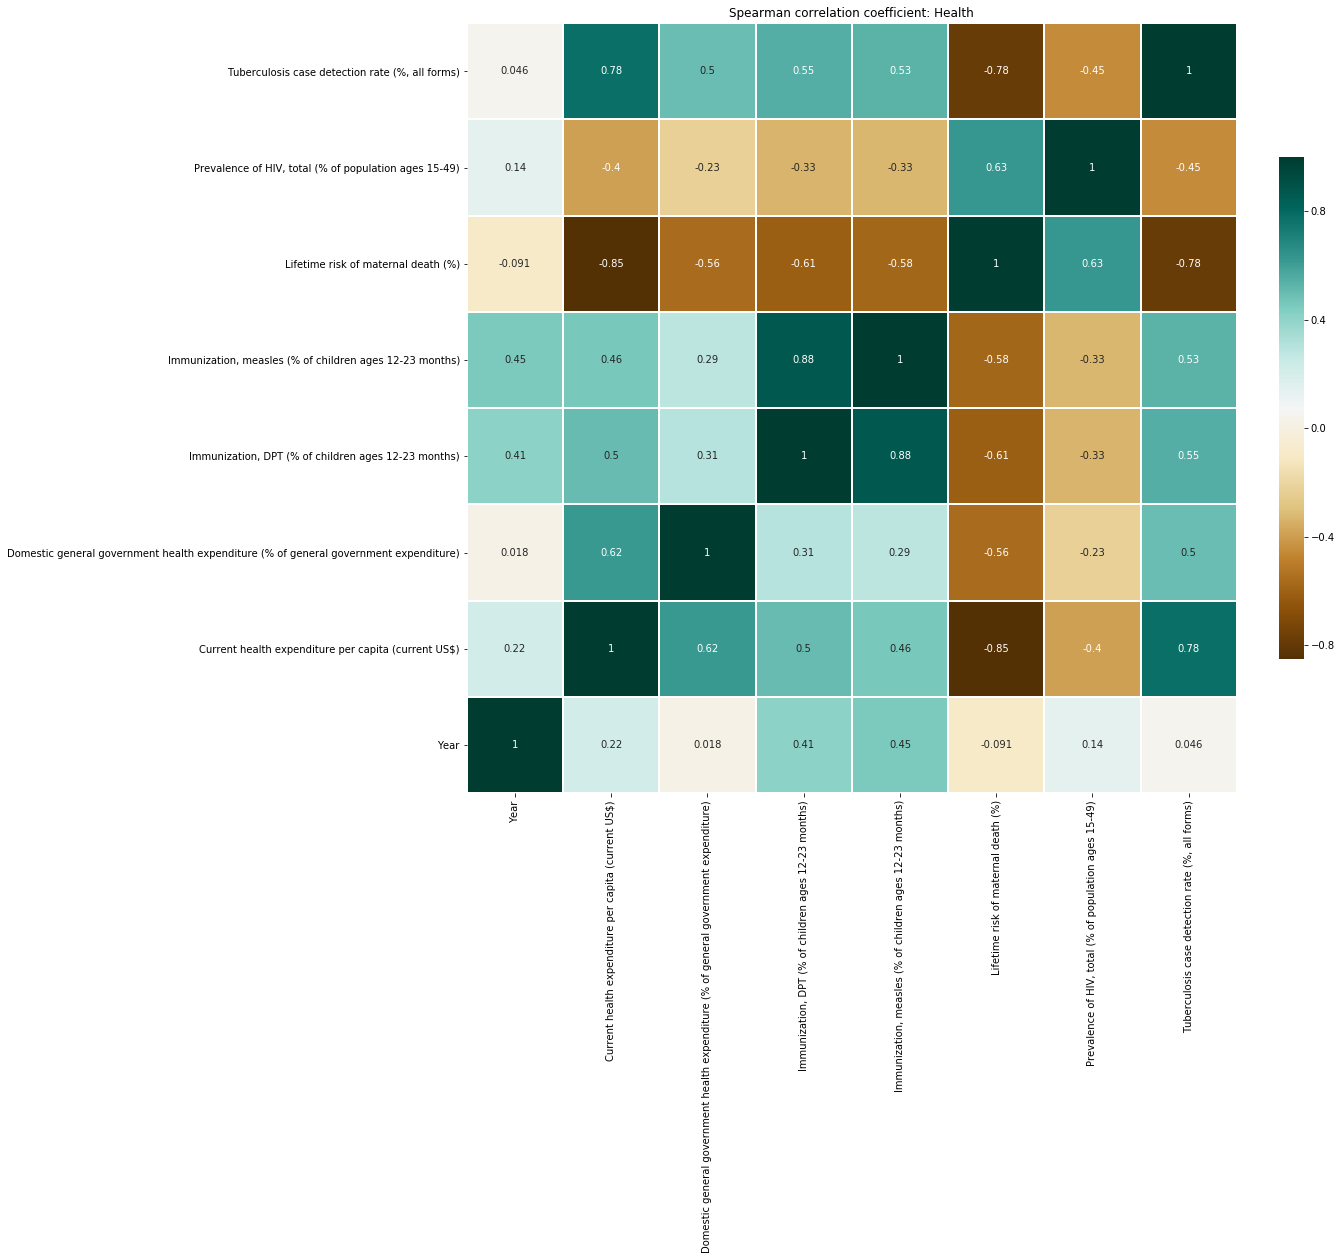

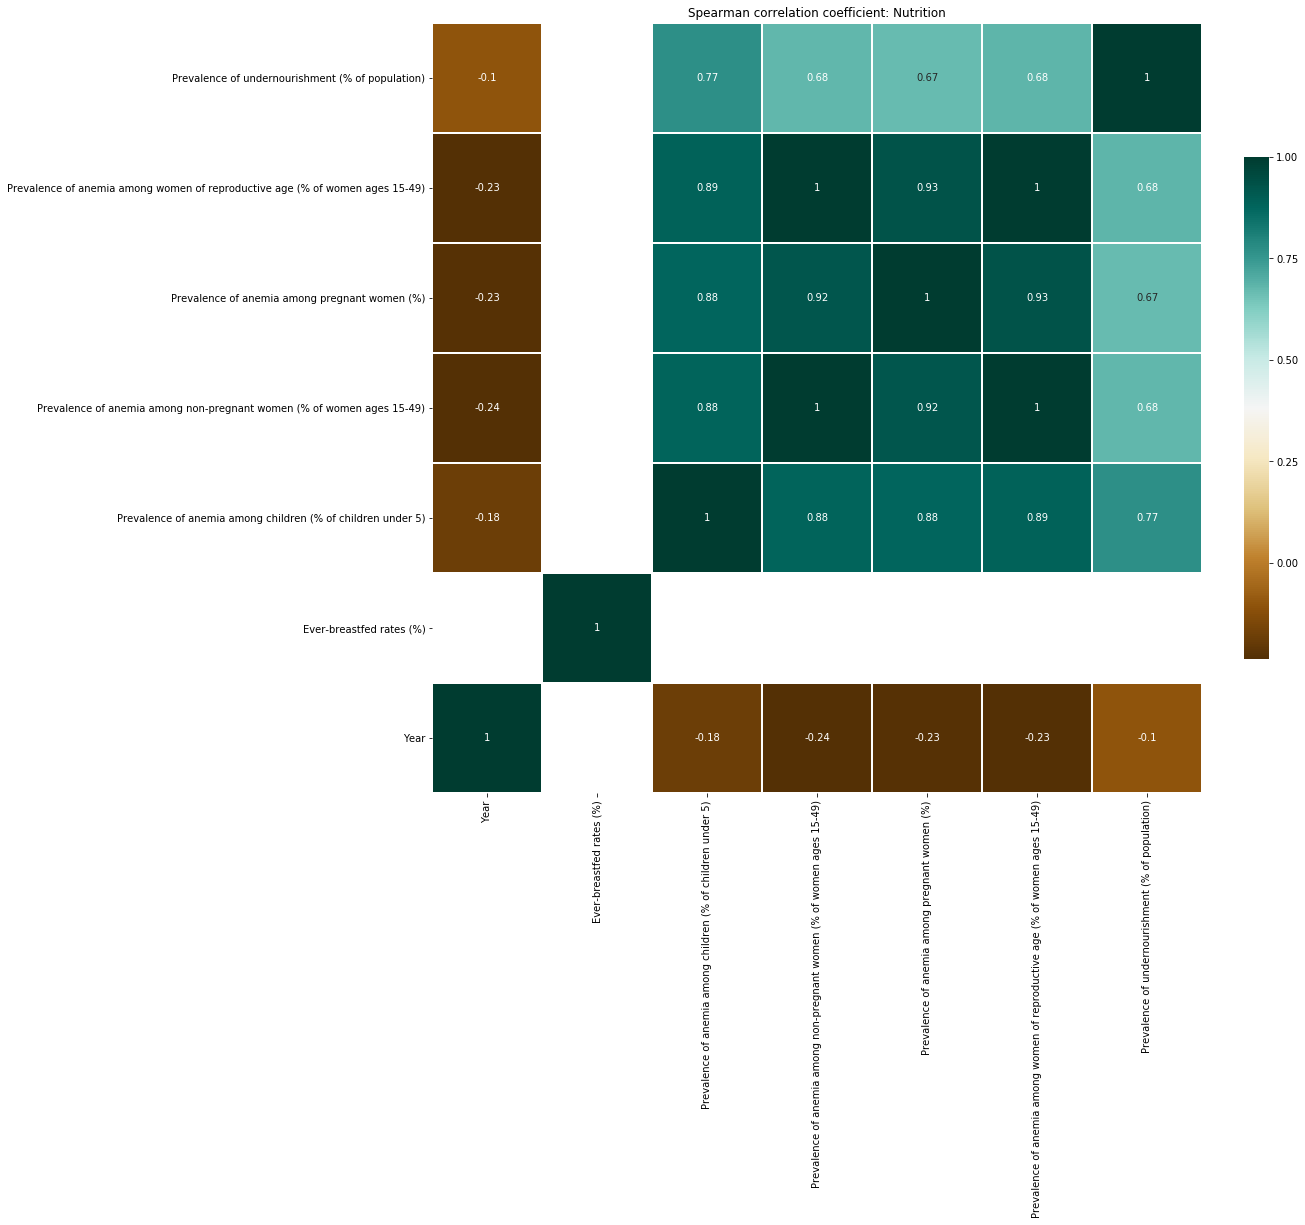

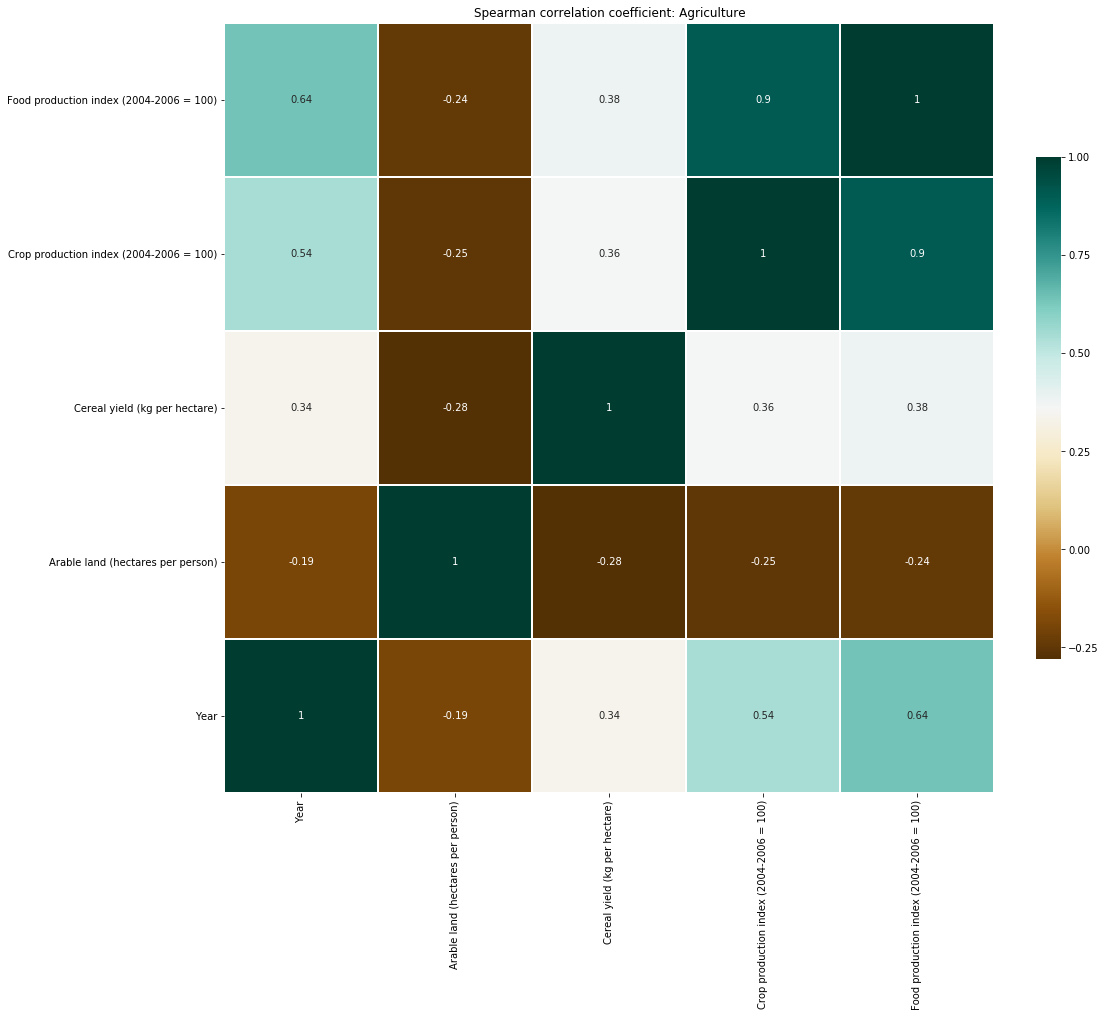

In [108]:
for category in CATS:
    get_corr(ds_new,category)